In [68]:
from __future__ import division
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

# ANN - XOR

In [69]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

Declaracion de variables

In [70]:
input_size=2
hidden_layers=2
middle_layer=2
output_size=1
x=tf.placeholder(tf.float32,shape=[None,input_size])
y_=tf.placeholder(tf.float32,shape=[None,output_size])

Operaciones, grafo

In [71]:
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_layer], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_layer]), name="b_layer1")

In [72]:
W_layer2 = tf.Variable(tf.random_uniform([hidden_layers,output_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_size]), name="b_layer2")

In [73]:
hidden_1=tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
y= tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) 
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [74]:
init = tf.initialize_all_variables()
sess = tf.Session() 

Instructions for updating:
Use `tf.global_variables_initializer` instead.


## Correr programa

In [75]:
sess.run(init)
for i in range(50000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [76]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.1176854]]
[[-4.94534922 -5.4506855 ]
 [ 5.15994596  5.3601675 ]]


## Cuantificar Error

In [77]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

In [90]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[1]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

In [92]:
w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]

In [93]:
m1=((w1[0]/w1[2]))/((-w1[0]/w1[1]))
m2=((w2[0]/w2[2]))/((-w2[0]/w2[1]))

(-0.5, 1.5)

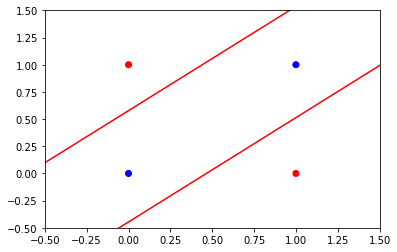

In [95]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-0.5,1.5,100) # 100 numeros espaciados
plt.plot(x2,-w1[0]/w1[2]+m1*x2,color='red')
plt.plot(x2,-w2[0]/w2[2]+m2*x2,color='red')
plt.ylim([-0.5,1.5])
plt.xlim([-0.5,1.5])

In [96]:
sess.close()